<a href="https://colab.research.google.com/github/dasog94/deep_learning_for_everyone/blob/master/18_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [4]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = numpy.max(Y_train)+1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '학습용 뉴스 기사')
print(X_train[0])

2113536/2110848 [==============================] - 1s 1us/step
46 카테고리
8982 학습용 뉴스 기사
2246 학습용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [0]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [0]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
90/90 [==============================] - 22s 240ms/step - loss: 2.5769 - accuracy: 0.3497 - val_loss: 2.1718 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 21s 235ms/step - loss: 2.0382 - accuracy: 0.4894 - val_loss: 1.9761 - val_accuracy: 0.4996
Epoch 3/20
90/90 [==============================] - 21s 238ms/step - loss: 1.8855 - accuracy: 0.5168 - val_loss: 1.7895 - val_accuracy: 0.5419
Epoch 4/20
90/90 [==============================] - 22s 239ms/step - loss: 1.7089 - accuracy: 0.5572 - val_loss: 1.7641 - val_accuracy: 0.5419
Epoch 5/20
90/90 [==============================] - 21s 237ms/step - loss: 1.6843 - accuracy: 0.5679 - val_loss: 1.6853 - val_accuracy: 0.5735
Epoch 6/20
90/90 [==============================] - 22s 239ms/step - loss: 1.6042 - accuracy: 0.5905 - val_loss: 1.6496 - val_accuracy: 0.5971
Epoch 7/20
90/90 [==============================] - 21s 239ms/step - loss: 1.5154 - accuracy: 0.6162 - val_loss: 1.5258 - val_accuracy: 0.6327

In [11]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

71/71 [==============================] - 2s 24ms/step - loss: 1.2159 - accuracy: 0.7204

 Test Accuracy: 0.7204


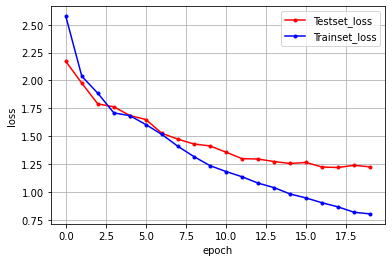

In [13]:
Y_vloss = history.history['val_loss']
Y_loss = history.history['loss']

X_len = numpy.arange(len(Y_loss))
plt.plot(X_len, Y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(X_len, Y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()